
✅ Benchmark Point:
Area     6463336.47
PDP          1100.4
SSIM            1.0
Label          set1
Name: 0, dtype: object

🔍 Threshold Points (Area <= 4320000, PDP <= 880, SSIM >= 0.7):

       Area         PDP      SSIM Label
11  4301839  849.908936  0.700259  set1
13  4302574  845.314994  0.714409  set1
14  4302079  849.343662  0.746113  set1
15  4301286  851.194840  0.703545  set1
16  4301795  850.149512  0.717200  set1
18  4313623  848.812263  0.746442  set1

📈 Percentage Increase over Benchmark:
• Point 11: Area ↑ -33.44%, PDP ↑ -22.76%, SSIM ↑ -29.97%
• Point 13: Area ↑ -33.43%, PDP ↑ -23.18%, SSIM ↑ -28.56%
• Point 14: Area ↑ -33.44%, PDP ↑ -22.82%, SSIM ↑ -25.39%
• Point 15: Area ↑ -33.45%, PDP ↑ -22.65%, SSIM ↑ -29.65%
• Point 16: Area ↑ -33.44%, PDP ↑ -22.74%, SSIM ↑ -28.28%
• Point 18: Area ↑ -33.26%, PDP ↑ -22.86%, SSIM ↑ -25.36%


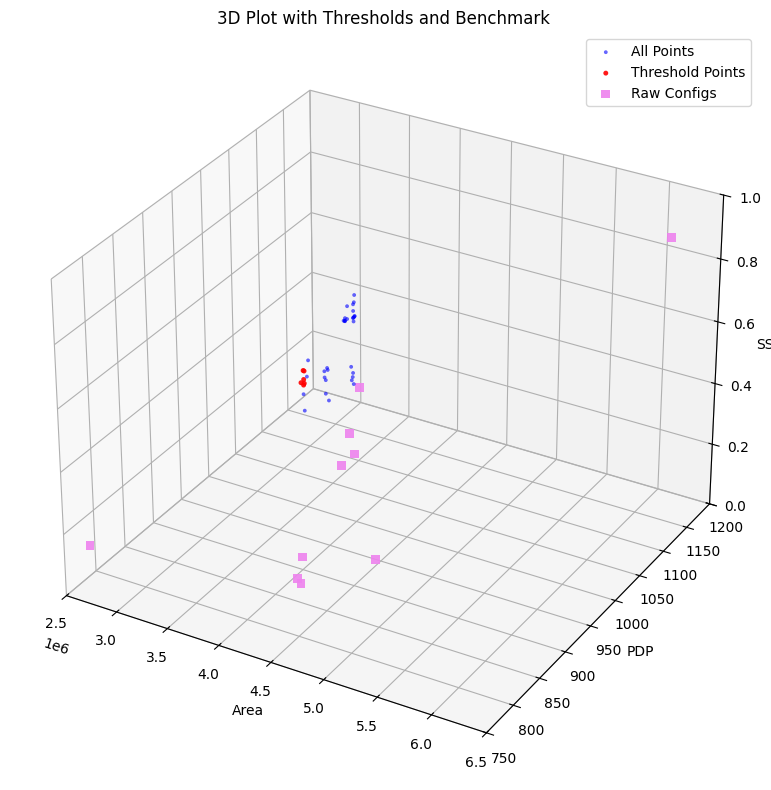

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------------- Load CSVs ----------------
pareto_files = [
    "Composite_plot_sim/CSV_pareto_64.csv",
    "Composite_plot_sim/CSV_pareto_128.csv",
    "Composite_plot_sim/CSV_pareto_256.csv",
    "Composite_plot_sim/CSV_pareto_512.csv"
]
df_list = [pd.read_csv(file) for file in pareto_files]
df = pd.concat(df_list, ignore_index=True)

# Load raw config CSV
raw_config_csv = "Composite_plot_sim/raw_config_ssim.csv"  # Replace with your actual filename
raw_df = pd.read_csv(raw_config_csv)

# ---------------- Validate Columns ----------------
required_columns = ['Area', 'PDP', 'SSIM']
for data, name in [(df, "Pareto CSVs"), (raw_df, "Raw Config CSV")]:
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"{name} must contain columns: {required_columns}")

# ---------------- Axis Ranges ----------------
area_range = (2500000, 6500000)
pdp_range = (750, 1200)
ssim_range = (0, 1)

# ---------------- Plot Function ----------------
def plot_with_thresholds(x_thresh, y_thresh, z_thresh):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # ✅ Extract benchmark
    benchmark = raw_df.iloc[0]
    print("\n✅ Benchmark Point:")
    print(benchmark)

    # Filter threshold points from Pareto data
    in_thresh = df[
        (df['Area'] <= x_thresh) &
        (df['PDP'] <= y_thresh) &
        (df['SSIM'] >= z_thresh)
    ]

    print("\n🔍 Threshold Points (Area <= {}, PDP <= {}, SSIM >= {}):\n".format(
        x_thresh, y_thresh, z_thresh
    ))
    print(in_thresh)

    # ---------------- Percentage Increase ----------------
    print("\n📈 Percentage Increase over Benchmark:")
    for i, row in in_thresh.iterrows():
        area_inc = ((row['Area'] - benchmark['Area']) / benchmark['Area']) * 100
        pdp_inc = ((row['PDP'] - benchmark['PDP']) / benchmark['PDP']) * 100
        ssim_inc = ((row['SSIM'] - benchmark['SSIM']) / benchmark['SSIM']) * 100

        print(f"• Point {i}: Area ↑ {area_inc:.2f}%, PDP ↑ {pdp_inc:.2f}%, SSIM ↑ {ssim_inc:.2f}%")

    # Points outside threshold
    out_thresh = df.drop(in_thresh.index)

    # Plot all other points in blue
    ax.scatter(out_thresh['Area'], out_thresh['PDP'], out_thresh['SSIM'],
               c='blue', marker='.', s=30, label='All Points',
               alpha=0.6, edgecolor='none')

    # Plot threshold points in red
    if not in_thresh.empty:
        ax.scatter(in_thresh['Area'], in_thresh['PDP'], in_thresh['SSIM'],
                   c='red', marker='.', s=50, label='Threshold Points',
                   alpha=0.9, edgecolor='none')

    # ✅ Plot raw config points in violet squares
    ax.scatter(raw_df['Area'], raw_df['PDP'], raw_df['SSIM'],
               c='violet', marker='s', s=40, label='Raw Configs',
               alpha=0.9, edgecolor='none')

    # Set axis ranges
    ax.set_xlim(area_range)
    ax.set_ylim(pdp_range)
    ax.set_zlim(ssim_range)

    # Labels and title
    ax.set_xlabel('Area')
    ax.set_ylabel('PDP')
    ax.set_zlabel('SSIM')
    ax.set_title('3D Plot with Thresholds and Benchmark')
    ax.legend()
    plt.tight_layout()
    plt.show()

# ---------------- Run Plot ----------------
plot_with_thresholds(x_thresh=4320000, y_thresh=880, z_thresh=0.7)
